#### Import Libraries

In [816]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

### **Data Dictionary**

#### 📘 **RSQA_CLEAN Data Dictionary**

| Column Name       | Description                                                                                           | Data Type     | Example Values                        |
|------------------|-------------------------------------------------------------------------------------------------------|---------------|----------------------------------------|
| `hf_name`         | Name of the health facility where RSQA was conducted                                                  | String        | `kigali health center`, `kibuye dh`    |
| `genexpert_site`  | Indicates whether the site has a GeneXpert machine                                                    | Categorical   | `yes`, `no`                            |
| `hf_type`         | Type of the health facility                                                                           | Categorical   | `hospital`, `health center`            |
| `hf_tb_type`      | TB service category provided by the health facility                                                   | Categorical   | `ctd`, `ct`                            |
| `fy`              | Fiscal year during which the RSQA activity occurred                                                   | String        | `fy 2022-2023`, `fy 2023-2024`         |
| `province`        | Province where the facility is located                                                                | Categorical   | `kigali`, `northern`                   |
| `district`        | District where the facility is located                                                                | Categorical   | `gasabo`, `huye`                       |
| `summary_group`   | High-level question category or indicator group used in RSQA                                          | String        | `Are TB patients early initiated...`   |
| `normes`          | Specific RSQA guideline or indicator being assessed                                                   | String        | `Patient file availability`            |
| `item_name`       | Specific element being verified on-site (formerly `Element à verifier`)                              | String        | `Lab register filled`                  |
| `num`             | Numerator for RSQA performance indicator                                                              | Integer       | `5`, `10`, `20`                        |
| `den`             | Denominator for RSQA performance indicator                                                            | Integer       | `10`, `20`, `30`                       |
| `section`         | Functional TB program area that the `summary_group` falls under                                       | Categorical   | `screening`, `diagnosis`, `treatment`  |


#### Load the data

In [817]:
rsqa_df = pd.read_csv("../_data/tb-rsqa.csv", encoding="ISO-8859-1")
gen_df = pd.read_csv("../_data/tb-rsqa_GXP.csv")
rsqa_df = rsqa_df.copy()
gen_df = gen_df.copy()


#### Data Inspection

In [818]:
# Check RSQA data
print("RSQA DataFrame:")
print(rsqa_df.shape)
print(rsqa_df.columns)
rsqa_df.head()

RSQA DataFrame:
(25647, 24)
Index(['Name of Supervisor 1', 'Name of Supervisor 2', 'HF Name',
       'GeneXpert-site', 'HF Type', 'HF TB Type', 'Province', 'District',
       'Sub_District', 'Period of implementation', 'FY',
       'Domaine d'activités du NSP 2013-2018', 'Summary group',
       'Category of activity', 'No_Old', 'NO', 'Normes ', 'Element à verifier',
       'Procedures ', 'Num', 'Den', '% (don't use)', 'Commentaires',
       'How many Times'],
      dtype='object')


,Name of Supervisor 1,Name of Supervisor 2,HF Name,GeneXpert-site,HF Type,HF TB Type,Province,District,Sub_District,Period of implementation,...,No_Old,NO,Normes,Element à verifier,Procedures,Num,Den,% (don't use),Commentaires,How many Times
0,MUNYANSHONGORE Aline,0,Ruli CS,NO,Health Center,CT,North,Gakenke,Ruli,1_March 2021,...,1,1,Toute FOSA doit rendre disponible des algorith...,"Les services VIH/ARV, Consultations externes, ...",Verifier la disponiblite de la boite des algor...,3,4,0.75,TB algorithms are available in OPD and TB ser...,1.0
1,MUNYANSHONGORE Aline,0,Ruli CS,NO,Health Center,CT,North,Gakenke,Ruli,1_March 2021,...,New_62,2,Les prestataires doivent avoir les connaissanc...,"Les prestataires des services ARV, Consultatio...",Verifier la liste du personnel forme sur la ...,4,4,1,They have been trained in 2020,1.0
2,MUNYANSHONGORE Aline,0,Ruli CS,NO,Health Center,CT,North,Gakenke,Ruli,1_March 2021,...,2,3,NaN,Sur 10 nouveaux prisonniers entrés au cours de...,"Faire une selection au hasard, par échantillon...",NaN,10,0,NaN,1.0
3,MUNYANSHONGORE Aline,0,Ruli CS,NO,Health Center,CT,North,Gakenke,Ruli,1_March 2021,...,New_63,4,NaN,Sur 10 nouveaux prisonniers sortants au cours ...,"Faire une selection au hasard, par échantillon...",NaN,10,0,NaN,1.0
4,MUNYANSHONGORE Aline,0,Ruli CS,NO,Health Center,CT,North,Gakenke,Ruli,1_March 2021,...,New_64,5,NaN,Sur les 10 derniers patients hospitalises( 5 p...,Verifier dans le dossier du patient hospitali...,NaN,10,0,NaN,1.0


Columns of Interest (based on names):

**Facility Identification**

- `HF Name`: Name of the health facility

- `HF Type`: Hospital or Health Center

- `GeneXpert-site`: Might indicate whether the facility has GeneXpert?

- `Province`, 'District', 'Sub_District': Geographic location
  

**Indicators/Assessment Information**

- `Num`, `Den`: These are likely the numerator and denominator for each TB quality indicator

- `% (don't use)`: A calculated percentage – possibly not recommended due to rounding/incompleteness

- `Element à verifier`: The exact question/indicator being assessed (could help categorize into Screening, Diagnosis, Treatment)

- `Category of activity`: Could help tag indicators as Screening/Diagnosis/Treatment

In [819]:
# Check GeneXpert sites
print("\nGeneXpert Sites DataFrame:")
print(gen_df.shape)
print(gen_df.columns)
gen_df.head()


GeneXpert Sites DataFrame:
(61, 2)
Index(['Genexpert.site', 'ddd'], dtype='object')


,Genexpert.site,ddd
0,Kibilizi DH,"Hospital (DH,PH,RH)"
1,Kora CS,Health Center
2,Remera CS,Health Center
3,Rwamagana PH,"Hospital (DH,PH,RH)"
4,Kicukiro CS,Health Center


We have:

- 61 facilities listed

- 2 columns:

`Genexpert.site`: Name of the facility with GeneXpert

`ddd`: Their type (e.g. Hospital or Health Center)

#### **Preview Facility Names for Matching**

In [820]:
# Preview facility names from both datasets
print("RSQA HF Names Example:")
print(rsqa_df['HF Name'].dropna().unique().shape)


RSQA HF Names Example:
(292,)


In [821]:
print("\nGeneXpert Site Names Example:")
print(gen_df['Genexpert.site'].dropna().unique().shape)


GeneXpert Site Names Example:
(60,)


#### **Let’s Investigate GeneXpert-site Column in rsqa_df**

In [822]:
print(rsqa_df['GeneXpert-site'].unique())
print(rsqa_df['GeneXpert-site'].value_counts(dropna=False))

['NO' 'YES']
GeneXpert-site
NO     18388
YES     7259
Name: count, dtype: int64


The GeneXpert-site column in rsqa_df:

- Has only two values: 'YES' and 'NO'
- Tells us whether the health facility has a GeneXpert machine
- 'YES': 7,259 records
- 'NO': 18,388 records

**We do not need `gen_df` for your analysis.**

#### **Extra Relevant Columns**

In [823]:
relevant_cols = [
    'HF Name',               # Health facility name
    'GeneXpert-site',        # Whether the site has GeneXpert
    'HF Type',               # Hospital or Health Center
    'HF TB Type',            # TB type (e.g., CTD(Center for Treatment & Diagnosis), CT(Center for Treatment))
    'FY',                    # Fiscal year
    'Province', 'District',  # Location info
    'Summary group',         # indicators sections
    'Normes ',                # question
    'Element à verifier',    # What was verified
    'Num',                   # Numerator of the indicator
    'Den',                   # Denominator of the indicator
];

# Extract selected relevant columns
rsqa_clean = rsqa_df[relevant_cols].copy()

# Preview shape and the first few rows
# print("Cleaned RSQA Data Shape:", rsqa_clean.shape)

### **Data Cleaning**

#### **Handling Duplicates**

In [824]:
# Check for duplicates
print(f"Number of duplicates: {rsqa_clean.duplicated().sum()}")

# Remove duplicates
rsqa_clean = rsqa_clean.drop_duplicates()

# Verify
print(f"Data after removing duplicates: {rsqa_clean.shape}")


Number of duplicates: 176
Data after removing duplicates: (25471, 12)


#### **Handle Missing Values**

In [825]:
# Check for missing values
missing_values = rsqa_clean.isnull().sum()
print(f"\nMissing Values:\n{missing_values[missing_values > 0]}")



Missing Values:
Normes                9711
Element à verifier    1089
Num                   4613
Den                   2201
dtype: int64


In [826]:
rsqa_clean["Element à verifier"] = rsqa_clean["Element à verifier"].fillna(rsqa_clean["Normes "])

# Verify
print(f"Data after handling missing values: {rsqa_clean.shape}")

Data after handling missing values: (25471, 12)


#### **Standardize Column Names**

In [827]:
# Rename columns to make them cleaner and consistent
rsqa_clean.columns = rsqa_clean.columns.str.strip().str.lower().str.replace(' ', '_')

rsqa_clean.rename(columns={
    'element_à_verifier': 'item_name',
    'genexpert-site': 'genexpert_site',
}, inplace=True)

# Verify the new column names
print(f"Renamed columns: {rsqa_clean.columns}")


Renamed columns: Index(['hf_name', 'genexpert_site', 'hf_type', 'hf_tb_type', 'fy', 'province',
       'district', 'summary_group', 'normes', 'item_name', 'num', 'den'],
      dtype='object')


#### **Fix Miswritten Provinces**

In [828]:
# Check unique province names to identify possible miswritten ones
print("\nUnique provinces before cleaning:")
print(rsqa_clean['province'].unique())

# Define a mapping to correct miswritten provinces (example)
province_mapping = {
    'SOURTHERN': 'southern',
    'South ': 'southern',
    'SUD': 'southern',
    # 'south': 'southern',
    # 'sud': 'southern',

    'North ': 'northern',
    'NORD': 'northern',
    # 'north ': 'northern',
    # 'nord': 'northern',

    'East ': 'eastern',
    'EAST': 'eastern',
    'East': 'eastern',
    # 'east': 'eastern',

    'Kigali city': 'kigali',
    # 'kigali city': 'kigali',

    'West ': 'western',
    'WEST': 'western',
    'west': 'western',
    # 'west ': 'western',
}

# Correct province names
rsqa_clean['province'] = rsqa_clean['province'].replace(province_mapping)

# Verify
print("\nUnique provinces after cleaning:")
print(rsqa_clean['province'].unique())



Unique provinces before cleaning:
['North ' 'East ' 'South ' 'West ' 'SOURTHERN' 'East' 'EAST' 'SUD' 'NORD'
 'WEST' 'Kigali city']

Unique provinces after cleaning:
['northern' 'eastern' 'southern' 'western' 'kigali']


#### **Standardize Fiscal Year**

In [829]:
# Clean the 'FY' column by removing the 'FY' prefix and standardizing format
rsqa_clean['fy'] = rsqa_clean['fy'].str.replace('FY ', '', regex=False)

# Verify
print("\nUnique Fiscal Years after cleaning:")
print(rsqa_clean['fy'].unique())
print(rsqa_clean['fy'].value_counts())



Unique Fiscal Years after cleaning:
['2020-2021' '2021-2022' '2022-2023' '2023-2024']
fy
2023-2024    9293
2020-2021    6969
2021-2022    6486
2022-2023    2723
Name: count, dtype: int64


#### **Standardize hf_type Values**

In [830]:
# Create a mapping to standardize 'hf_type' values
rsqa_clean.hf_type = rsqa_clean.hf_type.str.strip().str.lower()
hf_type_mapping = {
    'hospital (dh,ph,rh)': 'hospital',
}

# Apply the mapping to standardize values
rsqa_clean['hf_type'] = rsqa_clean['hf_type'].replace(hf_type_mapping)

# Verify
print("\nUnique 'hf_type' after cleaning:")
print(rsqa_clean['hf_type'].unique())



Unique 'hf_type' after cleaning:
['health center' 'hospital' 'prison' 'teaching hospital']


#### **Remove 'Prison' and 'Teaching Hospital' Samples**

In [831]:
# Filter out rows where 'hf_type' is either 'prison' or 'teaching hospital'
rsqa_clean = rsqa_clean[~rsqa_clean['hf_type'].isin(['prison', 'teaching hospital'])]

# Verify the removal
print("\nUnique 'hf_type' after removal:")
print(rsqa_clean['hf_type'].unique())

# Check the shape of the data after filtering
print("\nData shape after filtering:")
print(rsqa_clean.shape)



Unique 'hf_type' after removal:
['health center' 'hospital']

Data shape after filtering:
(24490, 12)


#### **Remove Specific Samples Based on HF Name**

In [832]:
# Remove rows where 'HF Name' is 'Butare Chu Hnr (huye)' or 'kanombe RH'
rsqa_clean = rsqa_clean[~rsqa_clean['hf_name'].isin(['Butare Chu Hnr (huye)', 'kanombe RH'])]

# Verify the removal
print("\nHF Names after removal:")
print(rsqa_clean['hf_name'].unique())

# Check the shape of the data after filtering
print("\nData shape after filtering:")
print(rsqa_clean.shape)



HF Names after removal:
['Ruli CS' 'Nyange (ruli) CS' 'Rwankuba CS' 'Minazi CS' 'Ruli DH'
 'Kinigi CS' 'Nyakinama CS' 'Rwaza CS' 'Ruhengeri RH'
 'Muhoza (Ruhengeri) CS' 'Kirehe CS' 'Kirehe DH' 'Mushikiri CS'
 'Rusumo CS' 'Musaza CS' 'Kibungo RH' 'Rukira CS' 'Rukoma Sake CS'
 'Mutenderi CS' ' Gitwe DH' 'Gitwe CS' 'Gishweru CS' 'Muremure CS'
 ' Byimana CS' 'Ruhunda CS' 'Musha (rwamagana) CS' 'Munyiginya CS'
 'Rwamagana PH' 'Nyagatare CS' 'Ntoma CS' ' Nyagatare DH'
 'Nyagatare Prison' 'Cyabayaga CS' 'Rukara CS' 'Gahini DH' 'Gahini CS'
 'Rutare (kayonza) CS' 'Mukarange CS' 'Kamubuga CS' 'Karambo (gakenke) CS'
 'Mataba CS' 'Gatonde CS' 'Nemba DH' 'Kinihira PH' 'Tumba CS' 'Tare CS'
 'Kisaro CS' 'Kinihira (rulindo) CS' 'Rugarama (gatsibo) CS' 'Gitoki CS'
 'Kabarore CS' 'Gatsibo CS' 'Rwimitereri CS' 'Kiziguro DH' 'Simbi CS'
 'Mukura (Huye) CS' 'Kabutare DH' 'Agahabwa CS' 'Kibilizi (gisagara) CS'
 'Kibayi CS' 'Mugombwa CS' 'Kibilizi DH' 'Gihara CS'
 'Kamonyi (gacurabwenge) CS' 'Mugina CS' 'Kay

#### **Update hf_type for Specific Facility**

In [833]:
# Update hf_type for 'kiziguro dh' from 'health center' to 'hospital'
rsqa_clean.loc[rsqa_clean['hf_name'] == 'kiziguro dh', 'hf_type'] = 'hospital'
rsqa_clean.loc[rsqa_clean['hf_name'] == 'gwinkwavu dh', 'hf_type'] = 'hospital'

# Verify the change
print("\nUpdated 'hf_type' for 'kiziguro dh':")
print(rsqa_clean[rsqa_clean['hf_name'] == 'kiziguro dh'][['hf_name', 'hf_type']])
print(rsqa_clean[rsqa_clean['hf_name'] == 'gwinkwavu dh'][['hf_name', 'hf_type']])

# Verify the unique hf_type values
print("\nUnique 'hf_type' after update:")
print(rsqa_clean['hf_type'].unique())



Updated 'hf_type' for 'kiziguro dh':
Empty DataFrame
Columns: [hf_name, hf_type]
Index: []
Empty DataFrame
Columns: [hf_name, hf_type]
Index: []

Unique 'hf_type' after update:
['health center' 'hospital']


#### **Correct hf_type for 'CT' Facilities Labeled as 'Hospital'**

In [834]:
# Correct hf_type for facilities where hf_tb_type is 'CT' and hf_type is 'hospital'
rsqa_clean.loc[(rsqa_clean['hf_tb_type'] == 'CT') & (rsqa_clean['hf_type'] == 'hospital'), 'hf_type'] = 'health center'

# Verify the change
print("\nUpdated 'hf_type' for 'CT' facilities mistakenly labeled as 'hospital':")
print(rsqa_clean[(rsqa_clean['hf_tb_type'] == 'CT') & (rsqa_clean['hf_type'] == 'hospital')][['hf_name', 'hf_tb_type', 'hf_type']])

# Verify the unique hf_type values
print("\nUnique 'hf_type' after update:")
print(rsqa_clean['hf_type'].unique())
rsqa_clean.shape



Updated 'hf_type' for 'CT' facilities mistakenly labeled as 'hospital':
Empty DataFrame
Columns: [hf_name, hf_tb_type, hf_type]
Index: []

Unique 'hf_type' after update:
['health center' 'hospital']


(24349, 12)

#### **Update hf_type for Hospitals Ending with 'cs' or 'CS'**

In [835]:
# Initial mask for mistakened hospitals
mask = rsqa_clean['hf_name'].str.endswith(('cs', 'CS')) & (rsqa_clean['hf_type'] == 'hospital')

print("Before updating hf_type to 'health center':", rsqa_clean[mask]['hf_name'].unique())

# Apply the fix
rsqa_clean.loc[mask, 'hf_type'] = 'health center'

# Recreate mask (optional: check if any were still missed)
new_mask = rsqa_clean['hf_name'].str.endswith(('cs', 'CS')) & (rsqa_clean['hf_type'] == 'hospital')

print("After updating hf_type, still marked as hospital:", rsqa_clean[new_mask]['hf_name'].unique())

Before updating hf_type to 'health center': ['Save CS' 'Ruhango CS']
After updating hf_type, still marked as hospital: []


#### **Update hf_type for Health Centers Ending with 'dh', 'ph', 'rh' or 'capitalized'**

In [836]:
# Identify and correct hf_type for facilities whose hf_name ends with 'cs' or 'CS' but are marked as 'hospital'
mask = rsqa_clean['hf_name'].str.endswith(('dh', 'ph', 'rh', 'DH', 'PH', 'RH')) & (rsqa_clean['hf_type'] == 'health center')

print("Before updating hf_type to 'hosptials':", rsqa_clean[mask]['hf_name'].unique())

# Update the hf_type to 'health center' for those facilities
rsqa_clean.loc[mask, 'hf_type'] = 'hospital'

new_mask = rsqa_clean['hf_name'].str.endswith(('dh', 'ph', 'rh', 'DH', 'PH', 'RH')) & (rsqa_clean['hf_type'] == 'health center')

# Verify the change
print("Before updating hf_type to 'hosptials':", rsqa_clean[new_mask]['hf_name'].unique())


Before updating hf_type to 'hosptials': [' Nyagatare DH' 'Kiziguro DH' 'gwinkwavu DH']
Before updating hf_type to 'hosptials': []


#### **Extract Categorical and Numerical Columns**

In [837]:
rsqa_clean["num"] = pd.to_numeric(rsqa_clean["num"], errors="coerce")
rsqa_clean["den"] = pd.to_numeric(rsqa_clean["den"], errors="coerce")

In [838]:
# Extract categorical columns (typically object type or category dtype)
categorical_columns = rsqa_clean.select_dtypes(include=['object', 'category']).columns.tolist()

# Extract numerical columns (typically int64 or float64 dtype)
numerical_columns = rsqa_clean.select_dtypes(include=['number']).columns.tolist()

# Display results
print("\nCategorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
['hf_name', 'genexpert_site', 'hf_type', 'hf_tb_type', 'fy', 'province', 'district', 'summary_group', 'normes', 'item_name']

Numerical Columns:
['num', 'den']


#### **Transform Categorical Columns to Lowercase**

In [839]:
# Loop through each categorical column and transform its values to lowercase
for col in categorical_columns:
    rsqa_clean[col] = rsqa_clean[col].str.strip().str.lower()

# Verify the changes by previewing the transformed categorical columns
print("\nPreview of Categorical Columns after Lowercasing:")
rsqa_clean.head()



Preview of Categorical Columns after Lowercasing:


,hf_name,genexpert_site,hf_type,hf_tb_type,fy,province,district,summary_group,normes,item_name,num,den
0,ruli cs,no,health center,ct,2020-2021,northern,gakenke,"are algorithms for tb screening, tb diagnosis ...",toute fosa doit rendre disponible des algorith...,"les services vih/arv, consultations externes, ...",3.0,4.0
1,ruli cs,no,health center,ct,2020-2021,northern,gakenke,"are tb monitoring tools existing, update and w...",les prestataires doivent avoir les connaissanc...,"les prestataires des services arv, consultatio...",4.0,4.0
2,ruli cs,no,health center,ct,2020-2021,northern,gakenke,is active case finding conducted in tb high ri...,NaN,sur 10 nouveaux prisonniers entrés au cours de...,NaN,10.0
3,ruli cs,no,health center,ct,2020-2021,northern,gakenke,is active case finding conducted in tb high ri...,NaN,sur 10 nouveaux prisonniers sortants au cours ...,NaN,10.0
4,ruli cs,no,health center,ct,2020-2021,northern,gakenke,are tb diagnostics continuously functional (mi...,NaN,sur les 10 derniers patients hospitalises( 5 p...,NaN,10.0


#### **Check and Remove Duplicates**

In [840]:
print("shape before removing duplicates:")
print(rsqa_clean.shape)
# Check for duplicates
duplicate_rows = rsqa_clean[rsqa_clean.duplicated()]

# Display the duplicate rows (if any)
print("\nDuplicate Rows:", duplicate_rows.shape)
duplicate_rows

# Remove duplicates
rsqa_clean = rsqa_clean.drop_duplicates()

# # Verify the shape of the DataFrame after removing duplicates
print("\nShape after removing duplicates:")
rsqa_clean.shape

shape before removing duplicates:
(24349, 12)

Duplicate Rows: (436, 12)

Shape after removing duplicates:


(23913, 12)

#### **version 2: Remove a few emerged teaching hospitals**

In [841]:
# Create a boolean mask for 'hf_name' starting with specific prefixes and ending with specific suffixes
mask = rsqa_clean['hf_name'].str.startswith(("ch", "kabgayi", 'kibuye', 'kigali', 'ngoma', 'huye', 'ruhengeri', 'rwanda')) & \
       rsqa_clean['hf_name'].str.endswith(("dh", "ph", 'rh'))

# Apply the mask to remove the matching rows
rsqa_clean = rsqa_clean[~mask]

# Verify the changes
print("\nData after removing rows:")
print(rsqa_clean.head())



Data after removing rows:
   hf_name genexpert_site        hf_type hf_tb_type         fy  province  \
0  ruli cs             no  health center         ct  2020-2021  northern   
1  ruli cs             no  health center         ct  2020-2021  northern   
2  ruli cs             no  health center         ct  2020-2021  northern   
3  ruli cs             no  health center         ct  2020-2021  northern   
4  ruli cs             no  health center         ct  2020-2021  northern   

  district                                      summary_group  \
0  gakenke  are algorithms for tb screening, tb diagnosis ...   
1  gakenke  are tb monitoring tools existing, update and w...   
2  gakenke  is active case finding conducted in tb high ri...   
3  gakenke  is active case finding conducted in tb high ri...   
4  gakenke  are tb diagnostics continuously functional (mi...   

                                              normes  \
0  toute fosa doit rendre disponible des algorith...   
1  les presta

#### **Remove `Prison` related question in `screening` section**

In [842]:
# Define the items to exclude
items_to_exclude = [
    "Sur 10 nouveaux prisonniers entrÃ©s au cours de la pÃ©riode evaluÃ©e, combien ont beneficiÃ© du screening TB Ã¡ l'entrÃ©e",
    "Sur 10 nouveaux prisonniers sortants au cours de la pÃ©riode evaluÃ©e, combien ont beneficiÃ© du screening TB Ã¡ la sortie"
]

# Filter out rows where item_name is in items_to_exclude
rsqa_clean = rsqa_clean[~rsqa_clean["item_name"].isin(items_to_exclude)]

#### **Feature engineering**: 
Derive a new 'section' column by mapping 'summary_group' to broader categories


In [843]:
rsqa_clean.summary_group.unique()

array(['are algorithms for tb screening, tb diagnosis and tb treatment available and displayed in health facilities?[questions 1 and 10]',
       'are tb monitoring tools existing, update and well used; supervisions and internal trainings conducted? [questions11, 12, 38, 39, 40, 41 and 42]',
       'is active case finding conducted in tb high risk groups?[questions 2, 8 and 9]',
       'are tb diagnostics continuously functional (microscopy and expert) and their results available timely (microscopy, expert and culture)?[questions 3, 4, 5, 6 and 7]',
       'are stocks of tb drugs and reagents well monitored? [questions 13, 14 and 15]',
       'are tb patients early initiated on tb treatment and on art (if indicated), and their bacteriological control performed according to guidelines?[questions 16, 17, 18 and 19]',
       'does the bmi monitored for tb patients and nutritional support provided to the eligible patients?[questions new_70 and new_71]',
       'does tb infection control pl

In [844]:
section_mapping = {
    "is active case finding conducted in tb high risk groups?[questions 2, 8 and 9]": "screening",
    "are tb diagnostics continuously functional (microscopy and expert) and their results available timely (microscopy, expert and culture)?[questions 3, 4, 5, 6 and 7]": "diagnosis",
    "are tb patients early initiated on tb treatment and on art (if indicated), and their bacteriological control performed according to guidelines?[questions 16, 17, 18 and 19]": "treatment",
    "does the bmi monitored for tb patients and nutritional support provided to the eligible patients?[questions new_70 and new_71]": "treatment",
    "are rooms where tb services are provided well ventilated and health workers personal protection existing and used? [questions 33, 34, 35, 36 and 37]": "infection_prevention",
    "does the bmi monitored for tb patients and nutritional support provided to the eligible patients?[questions new_70 and new_71]": "infection_prevention",
}

rsqa_clean["section"] = rsqa_clean["summary_group"].map(section_mapping)

# Keep only rows where section is screening, diagnosis, or treatment
rsqa_clean = rsqa_clean[rsqa_clean["section"].isin(["screening", "diagnosis", "treatment", "infection_prevention"])]

#### **Grouping**

In [845]:
# rsqa_clean = (
#     rsqa_clean.groupby(
#         ['province', 'section', 'summary_group', "genexpert_site", 'item_name', 'hf_name', 'hf_tb_type', 'hf_type', 'fy']
#     )
#     .agg({'num': 'sum', 'den': 'sum'})
#     .reset_index()
# )

#### **Remove on-applicable (N/A) questions**

filter out rows that meet one or more of these conditions, meaning the question wasn't applicable:

- den is missing → can't assess
- num is missing but den > 0 → incomplete data
- num == 0 and den == 0 → nothing to measure
- num > den → logically incorrect in most performance indicators

In [846]:
valid_df = rsqa_clean[
    (rsqa_clean["num"] <= rsqa_clean["den"]) &  # num must not be greater than den
    ~(rsqa_clean["num"].isna() & rsqa_clean["den"] > 0) &  # Exclude cases where num is NaN but den > 0
    ~((rsqa_clean["num"] == 0) & (rsqa_clean["den"] == 0)) &  # Exclude cases where both num and den are 0
    ~(rsqa_clean["den"].isna())  # Exclude cases where den is NaN (new fix)
]

invalid_df = rsqa_clean[
    (rsqa_clean["num"] > rsqa_clean["den"]) |  # Invalid if num > den
    ((rsqa_clean["num"].isna()) & (rsqa_clean["den"] > 0)) |  # Invalid if num is NaN but den > 0
    ((rsqa_clean["num"] == 0) & (rsqa_clean["den"] == 0)) |  # Invalid if both num and den are 0
    (rsqa_clean["den"].isna()) |  # Invalid if den is NaN
    ((rsqa_clean["num"].isna()) & (rsqa_clean["den"] == 0))  # NEW FIX: Invalid if num is NaN and den = 0
]

print("valid size: ", valid_df.shape)
print("invalid size: ", invalid_df.shape)
rsqa_clean = valid_df

valid size:  (6214, 13)
invalid size:  (2110, 13)


#### **Normalize or Scale each Question**

In [847]:
# Ensure numerical values
rsqa_clean["num"] = pd.to_numeric(rsqa_clean["num"], errors="coerce")
rsqa_clean["den"] = pd.to_numeric(rsqa_clean["den"], errors="coerce")

# Compute score safely
rsqa_clean["score_out_of_100"] = np.where(
    (rsqa_clean["den"] > 0) & (rsqa_clean["num"].notna()),
    (rsqa_clean["num"] / rsqa_clean["den"]) * 100,
    np.nan
)

In [864]:
rsqa_clean.section.value_counts()

section
infection_prevention    2211
diagnosis               1586
treatment               1450
screening                967
Name: count, dtype: int64

#### **Trend by screening and health centers each fiscal year from 2020 - 2024**

In [849]:
screening_hc = rsqa_clean[
    (rsqa_clean['section'] == 'screening') &
    (rsqa_clean['hf_type'] == 'health center')
]

# Group by fy and facility, aggregate num and den
facility_scores = screening_hc.groupby(['fy', 'hf_name']).agg(
    total_num=('num', 'sum'),
    total_den=('den', 'sum')
).reset_index()

# Recalculate score_out_of_100
facility_scores['score_out_of_100'] = 100 * facility_scores['total_num'] / facility_scores['total_den']

# Then average across all facilities per year
hc_result = facility_scores.groupby('fy').agg(
    average_score=('score_out_of_100', 'mean'),
    num_facilities=('hf_name', 'nunique')
).reset_index()
hc_result

,fy,average_score,num_facilities
0,2020-2021,86.050860,73
1,2021-2022,83.625903,69
2,2022-2023,83.694622,31
3,2023-2024,80.145903,69


`HC-CDT`

In [850]:
# Step 1: Filter the DataFrame
screening_hc_cdt = rsqa_clean[
    (rsqa_clean['section'] == 'screening') &
    (rsqa_clean['hf_type'] == 'health center') &
    (rsqa_clean['hf_tb_type'] == 'cdt') 
]

# step 2: Group by fiscal year
hc_cdt_result = screening_hc_cdt.groupby('fy').agg(
    average_score=('score_out_of_100', 'mean'),
    num_facilities=('hf_name', 'nunique'),
).reset_index()
hc_cdt_result

,fy,average_score,num_facilities
0,2020-2021,91.836735,29
1,2021-2022,85.980057,28
2,2022-2023,88.857143,12
3,2023-2024,77.967172,29


`HC-CT`

In [851]:
# Step 1: Filter the DataFrame
screening_hc_ct = rsqa_clean[
    (rsqa_clean['section'] == 'screening') &
    (rsqa_clean['hf_type'] == 'health center') &
    (rsqa_clean['hf_tb_type'] == 'ct') 
]

# step 2: Group by fiscal year
hc_ct_result = screening_hc_ct.groupby('fy').agg(
    average_score=('score_out_of_100', 'mean'),
    num_facilities=('hf_name', 'nunique'),
).reset_index()
hc_ct_result

,fy,average_score,num_facilities
0,2020-2021,81.071429,44
1,2021-2022,76.229621,41
2,2022-2023,83.518519,19
3,2023-2024,80.000000,41


#### **Diagnosis**

`Hospital`

In [852]:
# Step 1: Filter the DataFrame
diagnosis_hosp = rsqa_clean[
    (rsqa_clean['section'] == 'diagnosis') &
    (rsqa_clean['hf_type'] == 'hospital') 
]

# step 2: Group by fiscal year
diag_hosp_result = diagnosis_hosp.groupby('fy').agg(
    average_score=('score_out_of_100', 'mean'),
    num_facilities=('hf_name', 'nunique'),
).reset_index()
diag_hosp_result

,fy,average_score,num_facilities
0,2020-2021,78.318841,18
1,2021-2022,87.440000,20
2,2022-2023,75.579710,7
3,2023-2024,77.757576,38


`Health centers`

In [853]:
# Step 1: Filter the DataFrame
diagnosis_hc = rsqa_clean[
    (rsqa_clean['section'] == 'diagnosis') &
    (rsqa_clean['hf_type'] == 'health center') 
]

# step 2: Group by fiscal year
diag_hosp_result = diagnosis_hc.groupby('fy').agg(
    average_score=('score_out_of_100', 'mean'),
    num_facilities=('hf_name', 'nunique'),
).reset_index()
diag_hosp_result

,fy,average_score,num_facilities
0,2020-2021,69.411111,74
1,2021-2022,70.350877,68
2,2022-2023,63.689567,31
3,2023-2024,64.994606,69


`Health center genexpert sites`

In [854]:
# Step 1: Filter the DataFrame
diagnosis_genxpert = rsqa_clean[
    (rsqa_clean['section'] == 'diagnosis') &
    (rsqa_clean['hf_type'] == 'health center') &
    (rsqa_clean['genexpert_site'] == 'yes') 
]

# step 2: Group by fiscal year
diag_hc_xpert_result = diagnosis_genxpert.groupby('fy').agg(
    average_score=('score_out_of_100', 'mean'),
    num_facilities=('hf_name', 'nunique'),
).reset_index()
diag_hc_xpert_result

,fy,average_score,num_facilities
0,2020-2021,79.333333,3
1,2021-2022,87.142857,2
2,2022-2023,85.555556,3
3,2023-2024,75.333333,3


`HC-MICROSCOPY-ONLY`

In [855]:
# Step 1: Filter the DataFrame
diagnosis_genxpert = rsqa_clean[
    (rsqa_clean['section'] == 'diagnosis') &
    (rsqa_clean['hf_type'] == 'health center') &
    (rsqa_clean['genexpert_site'] == 'no') 
]

# step 2: Group by fiscal year
diag_hc_xpert_result = diagnosis_genxpert.groupby('fy').agg(
    average_score=('score_out_of_100', 'mean'),
    num_facilities=('hf_name', 'nunique'),
).reset_index()
diag_hc_xpert_result

,fy,average_score,num_facilities
0,2020-2021,68.888889,71
1,2021-2022,69.483395,66
2,2022-2023,61.484594,28
3,2023-2024,64.467120,66


### **Treatment**

`Hospital`

In [856]:
# Step 1: Filter the DataFrame
treatment_hospital = rsqa_clean[
    (rsqa_clean['section'] == 'treatment') &
    (rsqa_clean['hf_type'] == 'hospital')
]

# step 2: Group by fiscal year
treatment_hospital_results = treatment_hospital.groupby('fy').agg(
    average_score=('score_out_of_100', 'mean'),
    num_facilities=('hf_name', 'nunique'),
).reset_index()
treatment_hospital_results

,fy,average_score,num_facilities
0,2020-2021,96.369048,18
1,2021-2022,94.285714,20
2,2022-2023,87.758621,7
3,2023-2024,92.032967,38


`Health centers`

In [857]:
# Step 1: Filter the DataFrame
treatment_hc = rsqa_clean[
    (rsqa_clean['section'] == 'treatment') &
    (rsqa_clean['hf_type'] == 'health center')
]

# step 2: Group by fiscal year
treatment_hc_total_result = treatment_hc.groupby('fy').agg(
    average_score=('score_out_of_100', 'mean'),
    num_facilities=('hf_name', 'nunique'),
).reset_index()
treatment_hc_total_result

,fy,average_score,num_facilities
0,2020-2021,89.954407,74
1,2021-2022,87.438163,69
2,2022-2023,83.200000,30
3,2023-2024,84.856688,69


`CDT`

In [858]:
# Step 1: Filter the DataFrame
treatment_hc_cdt = rsqa_clean[
    (rsqa_clean['section'] == 'treatment') &
    (rsqa_clean['hf_type'] == 'health center') &
    (rsqa_clean['hf_tb_type'] == 'cdt') 
]

# step 2: Group by fiscal year
treatment_hc_cdt_results = treatment_hc_cdt.groupby('fy').agg(
    average_score=('score_out_of_100', 'mean'),
    num_facilities=('hf_name', 'nunique'),
).reset_index()
treatment_hc_cdt_results

,fy,average_score,num_facilities
0,2020-2021,94.436090,29
1,2021-2022,87.923729,28
2,2022-2023,91.923077,12
3,2023-2024,90.232558,29


`CT`

In [859]:
# Step 1: Filter the DataFrame
treatment_hc_ct = rsqa_clean[
    (rsqa_clean['section'] == 'treatment') &
    (rsqa_clean['hf_type'] == 'health center') &
    (rsqa_clean['hf_tb_type'] == 'ct') 
]

# step 2: Group by fiscal year
treatment_hc_ct_results = treatment_hc_ct.groupby('fy').agg(
    average_score=('score_out_of_100', 'mean'),
    num_facilities=('hf_name', 'nunique'),
).reset_index()
treatment_hc_ct_results

,fy,average_score,num_facilities
0,2020-2021,86.913265,45
1,2021-2022,87.090909,41
2,2022-2023,76.986301,18
3,2023-2024,81.108108,41


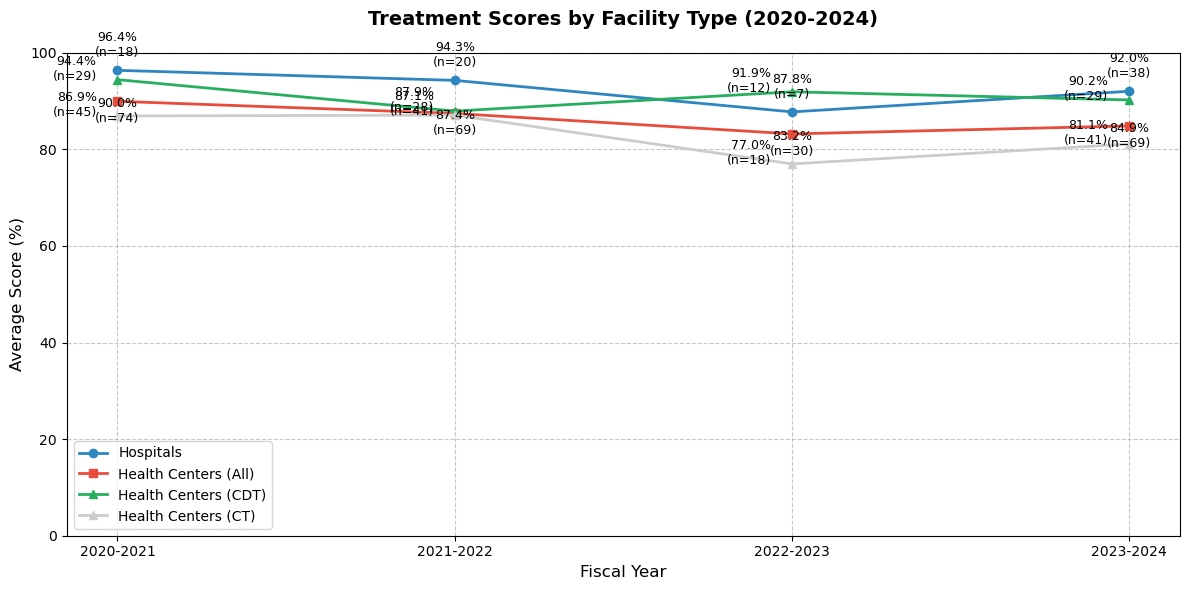

In [860]:
# Create a professional line chart comparing treatment results
plt.figure(figsize=(12, 6))

# Plot all three lines with distinct colors and markers
plt.plot(treatment_hospital_results['fy'], treatment_hospital_results['average_score'], 
         marker='o', linewidth=2, label='Hospitals', color='#2E86C1')
plt.plot(treatment_hc_total_result['fy'], treatment_hc_total_result['average_score'], 
         marker='s', linewidth=2, label='Health Centers (All)', color='#E74C3C')
plt.plot(treatment_hc_cdt_results['fy'], treatment_hc_cdt_results['average_score'], 
         marker='^', linewidth=2, label='Health Centers (CDT)', color='#27AE60')
plt.plot(treatment_hc_cdt_results['fy'], treatment_hc_ct_results['average_score'], 
         marker='^', linewidth=2, label='Health Centers (CT)', color='#ccc')

# Customize the plot
plt.title('Treatment Scores by Facility Type (2020-2024)', 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Average Score (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Add data labels with number of facilities
for i, (x, y, n) in enumerate(zip(treatment_hospital_results['fy'], 
                                 treatment_hospital_results['average_score'],
                                 treatment_hospital_results['num_facilities'])):
    plt.annotate(f'{y:.1f}%\n(n={n})', (x, y), 
                 textcoords="offset points", xytext=(0,10), 
                 ha='center', fontsize=9)
    
for i, (x, y, n) in enumerate(zip(treatment_hc_total_result['fy'], 
                                 treatment_hc_total_result['average_score'],
                                 treatment_hc_total_result['num_facilities'])):
    plt.annotate(f'{y:.1f}%\n(n={n})', (x, y), 
                 textcoords="offset points", xytext=(0,-15), 
                 ha='center', fontsize=9)

for i, (x, y, n) in enumerate(zip(treatment_hc_cdt_results['fy'], 
                                 treatment_hc_cdt_results['average_score'],
                                 treatment_hc_cdt_results['num_facilities'])):
    plt.annotate(f'{y:.1f}%\n(n={n})', (x, y), 
                 textcoords="offset points", xytext=(-15,0), 
                 ha='right', fontsize=9)
    
for i, (x, y, n) in enumerate(zip(treatment_hc_ct_results['fy'], 
                                 treatment_hc_ct_results['average_score'],
                                 treatment_hc_ct_results['num_facilities'])):
    plt.annotate(f'{y:.1f}%\n(n={n})', (x, y), 
                 textcoords="offset points", xytext=(-15,0), 
                 ha='right', fontsize=9)

# Set y-axis limits from 0 to 100
plt.ylim(0, 100)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### **Infection Prevention and Control**

`Health Centers`

In [861]:
# Step 1: Filter the DataFrame
infection_prev_hc = rsqa_clean[
    (rsqa_clean['section'] == 'infection_prevention') &
    (rsqa_clean['hf_type'] == 'health center')
]

# step 2: Group by fiscal year
infection_prev_hc_results = infection_prev_hc.groupby('fy').agg(
    average_score=('score_out_of_100', 'mean'),
    num_facilities=('hf_name', 'nunique'),
).reset_index()
infection_prev_hc_results

,fy,average_score,num_facilities
0,2020-2021,68.951613,74
1,2021-2022,73.448276,69
2,2022-2023,75.204082,30
3,2023-2024,69.098532,69


`Hospitals`

In [862]:
# Step 1: Filter the DataFrame
infection_prev_hosp = rsqa_clean[
    (rsqa_clean['section'] == 'infection_prevention') &
    (rsqa_clean['hf_type'] == 'hospital')
]

# step 2: Group by fiscal year
infection_prev_hosp_results = infection_prev_hosp.groupby('fy').agg(
    average_score=('score_out_of_100', 'mean'),
    num_facilities=('hf_name', 'nunique'),
).reset_index()
infection_prev_hosp_results

,fy,average_score,num_facilities
0,2020-2021,80.504202,18
1,2021-2022,87.050360,20
2,2022-2023,80.465116,7
3,2023-2024,79.927798,38


C:\Users\Hp\AppData\Local\Temp\ipykernel_13708\1472479099.py:15: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, linestyle='--', alpha=0.7)


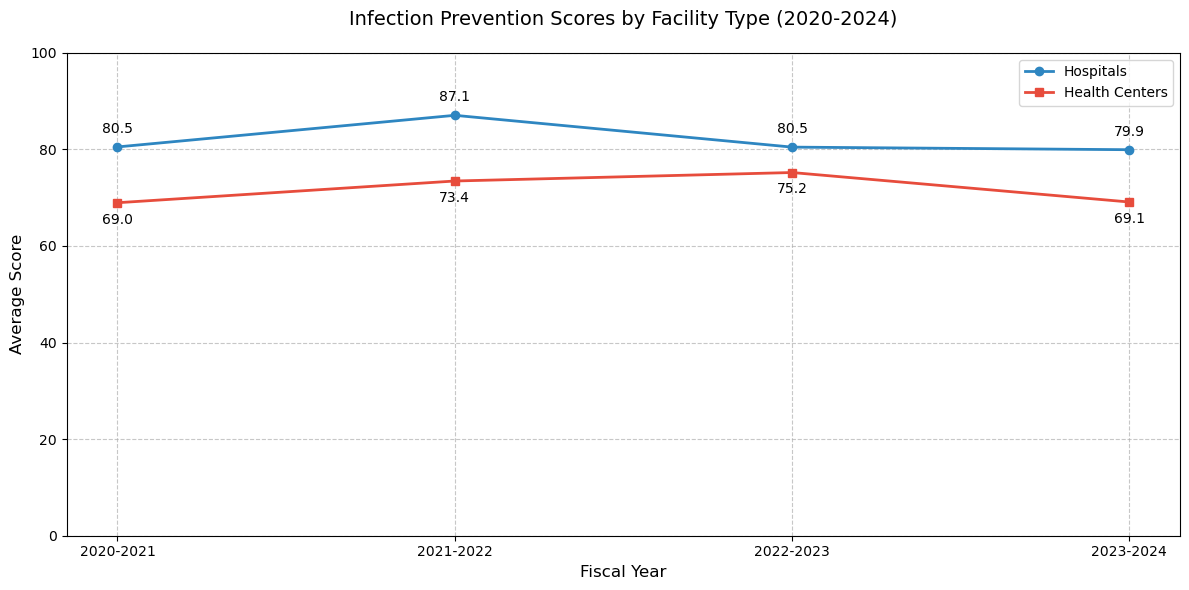

In [863]:
# Create a professional line chart comparing infection prevalence results
plt.figure(figsize=(12, 6))

# Plot both lines
plt.plot(infection_prev_hosp_results['fy'], infection_prev_hosp_results['average_score'], 
         marker='o', linewidth=2, label='Hospitals', color='#2E86C1')
plt.plot(infection_prev_hc_results['fy'], infection_prev_hc_results['average_score'], 
         marker='s', linewidth=2, label='Health Centers', color='#E74C3C')

# Customize the plot
plt.title('Infection Prevention Scores by Facility Type (2020-2024)', 
          fontsize=14, pad=20)
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.grid(False, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Add data labels
for i, (x, y) in enumerate(zip(infection_prev_hosp_results['fy'], infection_prev_hosp_results['average_score'])):
    plt.annotate(f'{y:.1f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
for i, (x, y) in enumerate(zip(infection_prev_hc_results['fy'], infection_prev_hc_results['average_score'])):
    plt.annotate(f'{y:.1f}', (x, y), textcoords="offset points", xytext=(0,-15), ha='center')

# Set y-axis limits from 0 to 100
plt.ylim(0, 100)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### **Characteristics of Health facilities**